# Supervised Learning -  Practice*3

### Group Members[max=2]:

### due Next Saturday

In [23]:
# 导入相关 python 库
import numpy as np
import pandas as pd

# 设定随机数种子，保证模型输出稳定
np.random.seed(42)

# 使用 matplotlib 绘图
%matplotlib inline
import matplotlib
#import seaborn
import matplotlib.pyplot as plt

**1.梯度下降求解线性回归模型**

*梯度下降求解回归模型的一个简单的应用*

In [24]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + 0.2 * np.random.randn(100, 1)

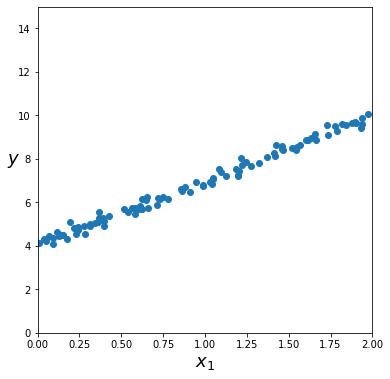

In [25]:
#对目标数据绘图表示
plt.figure(figsize=(6, 6))
plt.scatter(X, y)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error  # 用来计算mse, 用法 mean_squared_error(y_actual,y_predict)
X_b = np.c_[np.ones((100, 1)), X]
step = 0.1          # 步长
iterations = 1000   # 迭代次数
m = 100
theta = np.random.randn(2,1)
mse = []     # 用来存 mean square error
list_of_theta=[]
for iteration in range(iterations):
    gradients = 2./m * X_b.T.dot(X_b.dot(theta) - y)
    ################################# enter code below ############################################
    theta = theta - step*gradients  # gradient decent here
    ################################ enter code above #######################################
    pred_y = X_b.dot(theta)   # predicted y    
    list_of_theta.append(theta)
    mse.append(mean_squared_error(pred_y, y))
    

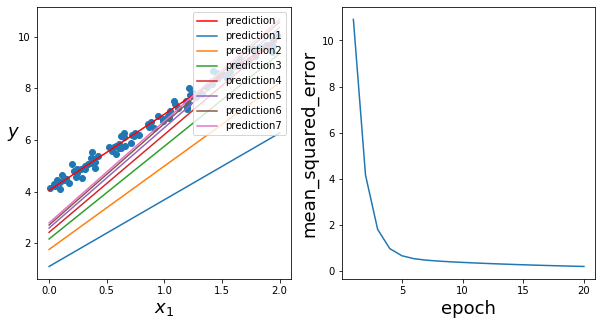

In [17]:
# show results
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.scatter(X, y)
plt.plot(X_new, X_new_b.dot(theta), 'r-', label='prediction')
for i in range(7):
    plt.plot(X_new, X_new_b.dot(list_of_theta[i]), label=f'prediction{i+1}')
    
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc='upper right')
iteration = 20
epochs = np.arange(1, iteration + 1)
plt.subplot(1,2,2)
plt.xlabel("epoch", fontsize=18)
plt.ylabel("mean_squared_error", rotation=90, fontsize=18)
plt.plot(epochs, mse[:iteration])
plt.show()

**2.KNN classifier**

In [18]:
import mltools as ml
iris = np.genfromtxt("./iris.txt",delimiter=None) 
Y = iris[:,-1] # target value (species) is the last value 
X = iris[:,0:-1] # features
X.shape , Y.shape

((148, 4), (148,))

总共有148条数据，每条数据对应4个特征X1,X2,X3,X4 ； Y为每个数据的label

In [19]:
np.random.seed(0) 
X,Y = ml.shuffleData(X,Y);
Xtr,Xva,Ytr,Yva = ml.splitData(X,Y, 0.75);

In [20]:
# how to build knn and make prediction (by using provided module)
K=5 #num of nearest neighbors
knn = ml.knn.knnClassify() # create the object and train it
knn.train(Xtr, Ytr, K)     # where K is an integer, e.g. 1 for nearest neighbor prediction
#alternatively:   model = ml.knn.knnClassify(Xtr,Ytr,k)
YvaHat = knn.predict(Xva)  # get estimates of y for each data point in Xva

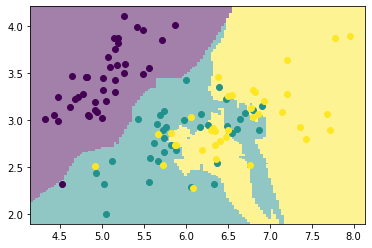

In [21]:
# plot classification plot for feature 1,2
Xtr_feature_1_2=Xtr[:,[0,1]] # 0->1st feature, 1->2rd feature
knn_2d=ml.knn.knnClassify(Xtr_feature_1_2,Ytr,5) 
ml.plotClassify2D( knn_2d, Xtr_feature_1_2, Ytr );#  only make 2D(2 feature) classification plot with data (Xtr,Ytr)

**开放性思考题**

根据上图（用第一和第二个feature做的knn分类），你认为该模型能做比较好的预测吗？为什么？

**我(们)认为:**

- 

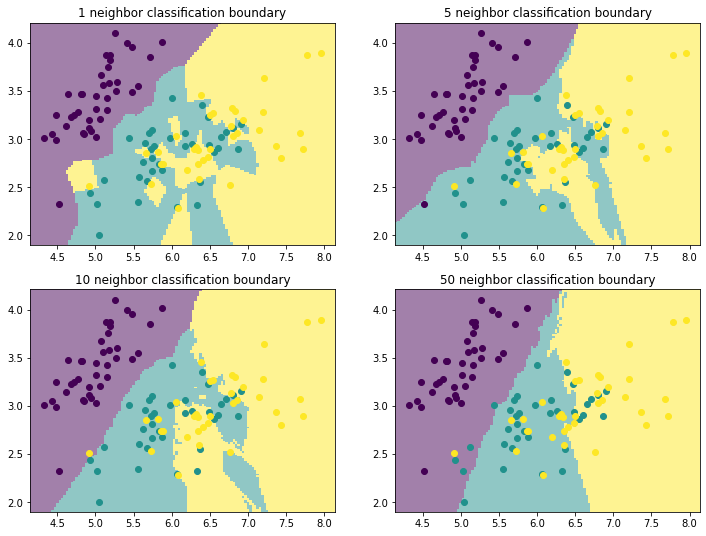

In [22]:
#plot 
K = [1,5,10,50] 
plt.figure(figsize=(12,9))

Xtr_feature_1_2=Xtr[:,[0,1]] # 0->1st feature, 1->2rd feature

for i,k in enumerate(K):
    plt.subplot(2,2,i+1) 
    plt.title(f"{k} neighbor classiﬁcation boundary") 
    ################################# enter code below ############################################
        #build model
        #plot model
    knn_2d= ml.knn.knnClassify(Xtr_feature_1_2,Ytr,k)
    ml.plotClassify2D( knn_2d, Xtr_feature_1_2, Ytr )
    ################################ enter code above #######################################

    

# 第三题见图片，答案写草稿纸上，发照片